In [1]:
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV


In [2]:
#%%writefile "Automobile Price prediction 2.ipynb"
df = pd.read_csv(r'C:/Users/Ali/Downloads/Automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Cleaning missing price values with mean() value.

In [4]:
df.price.replace('?',0, inplace=True)

In [5]:
df['price'] = pd.to_numeric(df['price'])

In [6]:
df.price.replace(0,df.price.mean(), inplace=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

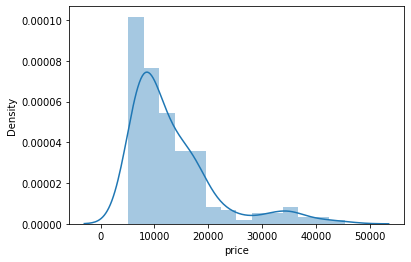

In [7]:
import seaborn as sns
sns.distplot(df.price)

### Cleaning Doors and Normalized loses

In [8]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0


In [9]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [10]:
df.loc[(df['num-of-doors'] == '?') , 'num-of-doors' ] = 'four' 

In [11]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [12]:
df['normalized-losses'].replace('?',0, inplace=True)

In [13]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['normalized-losses'].unique()

array([  0, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129, 115,  93, 142, 161,
       153, 125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,
        83, 102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95],
      dtype=int64)

In [14]:
pd.pivot_table(data=df , index='body-style', values='normalized-losses', aggfunc= np.mean )

,normalized-losses
body-style,
convertible,46.000000
hardtop,82.875000
hatchback,113.214286
sedan,100.583333
wagon,59.520000


In [15]:
df.loc[(df['body-style'] == 'hatchback') & (df['normalized-losses'] == 0), 'normalized-losses'] = 113
df.loc[(df['body-style'] == 'convertible') & (df['normalized-losses'] == 0), 'normalized-losses'] = 46
df.loc[(df['body-style'] == 'sedan') & (df['normalized-losses'] == 0), 'normalized-losses'] = 100
df.loc[(df['body-style'] == 'wagon') & (df['normalized-losses'] == 0), 'normalized-losses'] = 59
df.loc[(df['body-style'] == 'hardtop') & (df['normalized-losses'] == 0), 'normalized-losses'] = 82

### Cleaning Stroke and Bore

In [16]:
df[(df['bore'] == '?')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645.0


In [17]:
df['bore'].replace('?',0, inplace=True)
df['stroke'].replace('?',0, inplace=True)
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])

In [18]:
df.loc[(df['bore'] == 0), 'bore' ] = 3.21

In [19]:
df.loc[(df['stroke'] == 0), 'stroke' ] = 3.27

### Cleaing peak-rpm and horsepower

In [20]:
df[df['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [21]:
df[df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [22]:
df['peak-rpm'].replace('?', 0 , inplace=True)
df['horsepower'].replace('?', 0 , inplace=True)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [23]:
#pd.pivot_table(data=df, index=['body-style','make'], values='peak-rpm', aggfunc=np.mean)
pd.pivot_table(data=df , index=['body-style','drive-wheels'], values= ['horsepower', 'peak-rpm'], aggfunc=np.mean)

horsepower     peak-rpm
body-style  drive-wheels                         
convertible fwd            90.000000  5500.000000
            rwd           140.000000  5090.000000
hardtop     fwd            69.000000  5200.000000
            rwd           152.714286  5007.142857
hatchback   4wd           116.500000  4950.000000
            fwd            83.061224  5079.591837
            rwd           141.526316  5381.578947
sedan       4wd           102.666667  5033.333333
            fwd            86.631579  5154.385965
            rwd           129.222222  4970.833333
wagon       4wd            79.250000  4800.000000
            fwd            81.500000  4783.333333
            rwd           116.777778  4861.111111

In [24]:
df.loc[(df['body-style'] == 'wagon') & (df['horsepower'] == 0), 'horsepower'] = 81
df.loc[(df['body-style'] == 'hatchback') & (df['horsepower'] == 0), 'horsepower'] = 83
df.loc[(df['body-style'] == 'wagon') & (df['peak-rpm'] == 0), 'peak-rpm'] = 4783
df.loc[(df['body-style'] == 'hatchback') & (df['peak-rpm'] == 0), 'peak-rpm'] = 5079

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [26]:
### Cleaned Data
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,113,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [27]:
#Encoding
from sklearn.preprocessing import LabelEncoder
df2 = df
label_encoder = LabelEncoder()
encoded = label_encoder.fit(df2['make'])
df2['make'] = encoded.transform(df['make'])
df2['aspiration'].replace(to_replace=['std','turbo'], value=[0,1], inplace=True)
print(df2['drive-wheels'].unique())
df2['drive-wheels'].replace(to_replace=['rwd','fwd','4wd'], value=[0,1,2], inplace=True)
print(df2['engine-type'].unique())
df2['engine-type'].replace(to_replace=['dohc','ohcv','ohc','l','rotor','ohcf','dohcv'], value=[0,1,2,3,4,5,6], inplace=True)
print(df2['num-of-cylinders'].unique())
df2['num-of-cylinders'].replace(to_replace=['four','six','five','three','twelve','two','eight'], value=[0,1,2,3,4,5,6], inplace=True)
print(df2['fuel-system'].unique())
df2['fuel-system'].replace(to_replace=['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'], value=[0,1,2,3,4,5,6,7], inplace=True)
df2.info()


['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float

In [28]:
pd.set_option('max_columns',100)
df2.head(2)
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()
df2['fuel-type'] = lb.fit_transform(df2['fuel-type'])
df2['num-of-doors'] = lb.fit_transform(df2['num-of-doors'])
df2['body-style'] = lb.fit_transform(df2['body-style'])
df2['engine-location'] = lb.fit_transform(df2['engine-location'])


In [29]:

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int32  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [30]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,46,0,1,0,1,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,46,0,1,0,1,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,113,0,1,0,1,2,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,1,1,0,0,3,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,0,0,109.1,188.8,68.9,55.5,2952,2,0,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95,21,1,1,0,3,0,0,109.1,188.8,68.8,55.5,3049,2,0,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,95,21,1,0,0,3,0,0,109.1,188.8,68.9,55.5,3012,1,1,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,95,21,0,1,0,3,0,0,109.1,188.8,68.9,55.5,3217,2,1,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [31]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
print(X.shape)
print(y.shape)

(205, 25)
(205,)


In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(184, 25)
(21, 25)
(184,)
(21,)


# Hyperparameters for XGBOOST

In [35]:
params = {
    "learning_rate"   : [0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30],
    "max_depth"       : [3 ,4 ,5 ,6 , 7 , 8],
    "min_child_weight": [1.5 ,3.5 ,5.5 ,7.5],
    "gamma"           : [0.0 , 0.1 , 0.2 , 0.3 , 0.4],
    "n_estimators"    : [10 , 7 , 9 , 8 , 0],
    "colsample_bytree": [0.3 , 0.4 , 0.5 , 0.7]
}

In [ ]:
"""
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
"""

In [39]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour , temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin , tsec = divmod(temp_sec , 60)
        print('\n Time taken : %i hours %i minutes and %s seconds.' %(thour , tmin , round(tsec , 2)))

In [42]:
from datetime import datetime
start_time = datetime.now()
print(start_time)
print(divmod((datetime.now() - start_time).total_seconds() , 3600))
divmod((datetime.now() - start_time).total_seconds(), 60)

2021-01-17 15:20:44.594577
(0.0, 0.000999)


(0.0, 0.000999)

In [43]:
import xgboost

In [44]:
classifier = xgboost.XGBRegressor()

In [45]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = params, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [46]:
from datetime import datetime

start_time = timer(None)

rf_random.fit(X_train , y_train)

timer(start_time)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Time taken : 0 hours 1 minutes and 17.2 seconds.


In [47]:
print(rf_random.best_params_,"----------------")
print(rf_random.best_estimator_,"----------------")
print(rf_random.best_score_)


{'n_estimators': 10, 'min_child_weight': 1.5, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.4} ----------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) ----------------
0.8933388351894603


In [48]:
classifier = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
rf_random.best_estimator_.fit(X_train , y_train)
#OrderedDict(sorted(classifier.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier , X_train , y_train , cv = 10)
print(np.mean(score))

0.8875953943551462


In [51]:
print(rf_random.best_estimator_.score(X_train , y_train))

0.9749584484680309


In [52]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

In [53]:
from collections import OrderedDict


In [54]:
classifier.booster()

TypeError: 'str' object is not callable

In [76]:
OrderedDict(sorted(classifier.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))


TypeError: 'str' object is not callable

# XGboost for imbalanced Dataset

In [55]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [56]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
df.drop(columns={'ID'}, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [59]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]

1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)


In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

(27000, 23)
(3000, 23)
(27000,)
(3000,)
0    23364
1     6636
Name: default payment next month, dtype: int64
0    21028
1     5972
Name: default payment next month, dtype: int64
0    2336
1     664
Name: default payment next month, dtype: int64


In [63]:
from collections import Counter
cn = Counter
print(cn(y_test))
print(cn(y_train))

Counter({0: 2336, 1: 664})
Counter({0: 21028, 1: 5972})


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance


NameError: name 'mean' is not defined

In [66]:
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.75916


In [69]:
# Scale_pose_weight for imb_classes = no.of majory class / no.of minority class
counter = cn(y_train)
print(counter[0])
scale_pos_weight = counter[0] / counter[1]
print(scale_pos_weight)

21028
3.521098459477562


In [70]:
model = XGBClassifier(scale_pos_weight = scale_pos_weight)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.75653


# We can define a grid of hyperparamets for scale_pose_weight 

For different weighting ratios.

In [75]:
from sklearn.model_selection import GridSearchCV
weights = [1, 1.5, 2.5, 3.5, 5, 4, 6, 2.0]
param_grid = dict(scale_pos_weight=weights)
model = XGBClassifier()



grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best score : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score : 0.765326 using {'scale_pos_weight': 1}
0.765326 (0.005068) with: {'scale_pos_weight': 1}
0.763378 (0.008298) with: {'scale_pos_weight': 1.5}
0.763118 (0.006073) with: {'scale_pos_weight': 2.5}
0.758483 (0.010312) with: {'scale_pos_weight': 3.5}
0.760686 (0.010096) with: {'scale_pos_weight': 5}
0.757730 (0.005026) with: {'scale_pos_weight': 4}
0.759485 (0.008437) with: {'scale_pos_weight': 6}
0.760238 (0.008299) with: {'scale_pos_weight': 2.0}
